# Descriptive statistics problems

## 1. Exercise 1

We will use NumPy to obtain information to describe statistically.

- Generate an array of 100 elements following a normal distribution.
- Generate an array of 100 elements following a chi-square distribution with 3 degrees of freedom.
- Calculate the main metrics and statistical measures that best describe the two vectors.

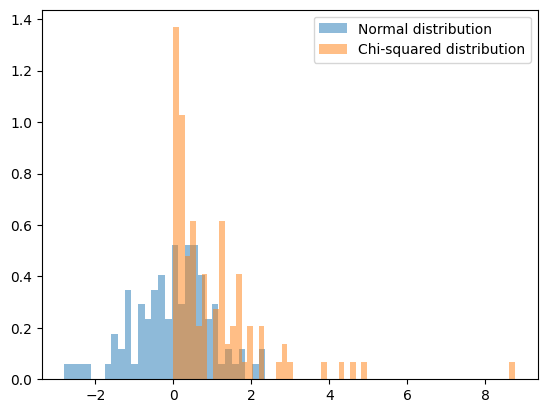

In [1]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

random_normal=np.random.normal(size=100)
random_chi=np.random.chisquare(1, size=100)

plt.hist(random_normal, bins=30, alpha=0.5, density=True, label='Normal distribution')
plt.hist(random_chi, bins=60, alpha=0.5, density=True, label='Chi-squared distribution')
plt.legend(loc='best')
plt.show()

### 1.2. Central tendency

#### 1.2.1 Mean

In [2]:
def get_mean(data: list) -> float:
    '''Calculates and returns mean of list.'''

    list_length=0
    list_sum=0

    for n in data:
        list_sum+=n
        list_length+=1

    return list_sum / list_length

print(f'Normal distribution mean: {get_mean(random_normal)}')
print(f'Chi-squared distribution mean: {get_mean(random_chi)}')

Normal distribution mean: 0.016551736228608727
Chi-squared distribution mean: 1.031095399590453


In [3]:
print(f'Normal distribution mean: {statistics.mean(random_normal)}')
print(f'Chi-squared distribution mean: {statistics.mean(random_chi)}')

Normal distribution mean: 0.016551736228608692
Chi-squared distribution mean: 1.0310953995904528


#### 1.2.2. Median

In [4]:
def get_median(data: list) -> float:
    '''Finds and return median of list'''

    # Sort the list of numbers
    for n in data:
        for i in range(len(data) - 1):
            if data[i] > data[i + 1]:
                tmp=data[i]
                data[i]=data[i+1]
                data[i+1]=tmp

    # Get middle number for odd length list
    if len(data) % 2 == 1:
        median_index=(len(data) + 1)/2
        list_median=data[median_index]

    # Get middle number index for even length list
    elif len(data) % 2 == 0:
        left_index=len(data) // 2
        right_index=(len(data) // 2) + 1
        list_median=(data[left_index] + data[right_index]) / 2

    return list_median

print(f'Normal median: {get_median(random_normal)}')
print(f'Chi-squared median: {get_median(random_chi)}')

Normal median: 0.11190283653244851
Chi-squared median: 0.6221968093411225


In [5]:
print(f'Normal median: {statistics.median(random_normal)}')
print(f'Chi-squared median: {statistics.median(random_chi)}')

Normal median: 0.10053910199817193
Chi-squared median: 0.5734410559364391


### Exercise 2

Write a Python program to calculate the standard deviation of the following data:

```py
data = [4, 2, 5, 8, 6]
```

In [6]:
data=[4,2,5,8,6]

#### 2.1. Easy solution with numpy

In [7]:
print(f'Standard deviation: {np.array(data).std()}')

Standard deviation: 2.0


#### 2.2. DIY solution

In [8]:
def get_sum(data: list) -> float:
    '''Calculates and returns sum of list.'''

    total=0

    for x in data:
        total+=x

    return total


def get_length(data: list) -> int:
    '''Finds and returns the length of a list.'''

    list_length=0

    for i in data:
        list_length+=1

    return list_length


def get_mean(data: list) -> float:
    '''Calculates and returns the arithmetic mean of a list.'''

    list_sum=get_sum(data)
    list_length=get_length(data)

    return list_sum/float(list_length)


def sum_squared_differences(data: list) -> float:
    '''Calculates and returns the sum of sqared differences from the mean for the
    numbers in a list.'''

    list_mean=get_mean(data)

    squared_differences_sum=0

    for x in data:
        squared_differences_sum+=(x - list_mean)**2

    return squared_differences_sum


def get_standard_deviation(data: list) -> float:
    '''Calculates and returns the standard deviation of numbers in a list.'''

    list_length=get_length(data)
    squared_differences_sum=sum_squared_differences(data)
    mean_squared_difference_sum=squared_differences_sum / float(list_length)

    return mean_squared_difference_sum**0.5


In [9]:
print(f'Standard deviation: {get_standard_deviation(data)}')

Standard deviation: 2.0


#### 2.3. Drag race

In [10]:
import random

list_len=10000000
data=[random.random() for _ in range(list_len)]

##### 2.3.1. NumPy

In [11]:
%%time
print(f'Standard deviation: {np.array(data).std()}')

Standard deviation: 0.28868270478852653
CPU times: user 312 ms, sys: 76.5 ms, total: 388 ms
Wall time: 389 ms


##### 2.3.1. DIY

In [12]:
%%time
print(f'Standard deviation: {get_standard_deviation(data)}')

Standard deviation: 0.2886827047885208
CPU times: user 1.45 s, sys: 6.32 ms, total: 1.46 s
Wall time: 1.47 s
